# Data Visualization

In [4]:
from scipy.io import loadmat
import numpy as np
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import sys
sys.path.append("..") # Adds higher directory to python modules path.


datas = loadmat("../data/raw/CD_PD.mat", squeeze_me=True)
%matplotlib inline

### Data info

In [5]:
print('subject size:',datas['dat'].size)

subject size: 196


In [6]:
mean = np.mean(datas['dat']['age'])
median = sorted(datas['dat']['age'])[datas['dat']['age'].shape[0] // 2]
mode = stats.mode(datas['dat']['age'])
std = np.std(datas['dat']['age'])
print('mean age: ',mean)
print('median age: ',median)
print('mode age: ', mode)
print('standard deviation: ',std)

mean age:  56.025510204081634
median age:  59
mode age:  ModeResult(mode=array([64], dtype=object), count=array([13]))
standard deviation:  17.47926941933127


In [7]:
data = datas['dat']

### Age (before cleaning)

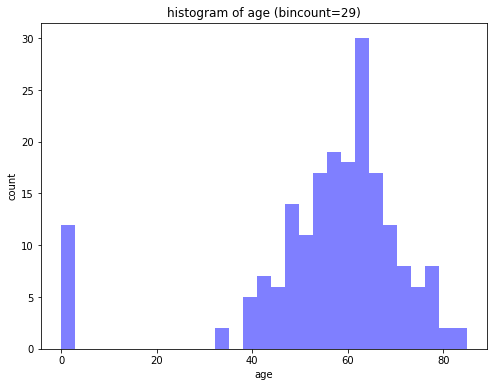

In [8]:
bin_count=29
plt.figure(figsize=(8,6))
plt.xlabel('age')
plt.ylabel('count')
n, bins, patches = plt.hist(data['age'], bins=bin_count, facecolor='blue', alpha=0.5)
plt.title('histogram of age (bincount={})'.format(bin_count))
plt.show()

age = 0 <- missing information

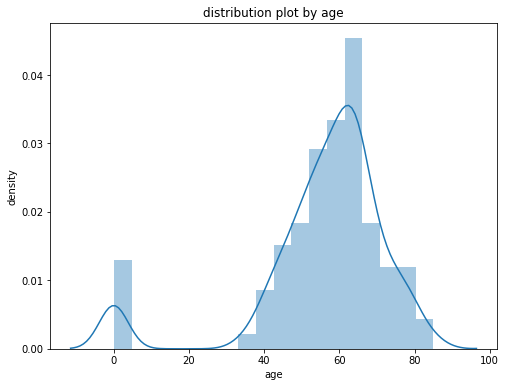

In [9]:
plt.figure(figsize=(8,6))
plt.title('distribution plot by age')
plt.xlabel('age')
plt.ylabel('density')
sns.distplot(datas['dat']['age'])
plt.show()

### Gender

There are 95 males and 101 females


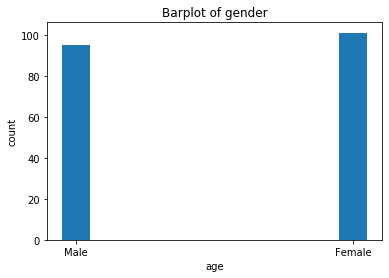

In [10]:
plt.title('Barplot of gender')
plt.xlabel('age')
plt.ylabel('count')
objects = ('Male', 'Female')
y_pos = np.arange(len(objects))
plt.xticks(y_pos, objects)
cnt_m = np.sum(data['gender'] == '0-Male')
cnt_f = np.sum(data['gender'] == '1-Female')
print('There are {} males and {} females'.format(cnt_m, cnt_f))
plt.bar([0, 1], [cnt_m, cnt_f], width=0.1)
plt.show()


# Plot data

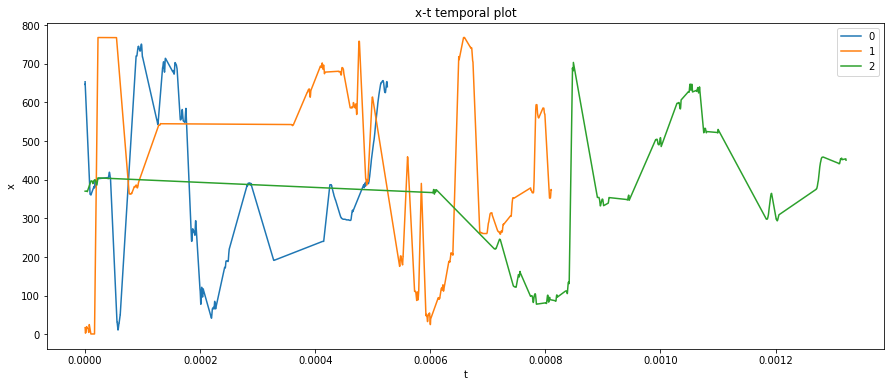

In [11]:
plt.figure(figsize=(15,6))
plt.title('x-t temporal plot')
plt.ylabel('x')
plt.xlabel('t')
for i in range(3):
    plt.plot(data['t'][i], data['x'][i], label=i)
plt.legend()
plt.show()

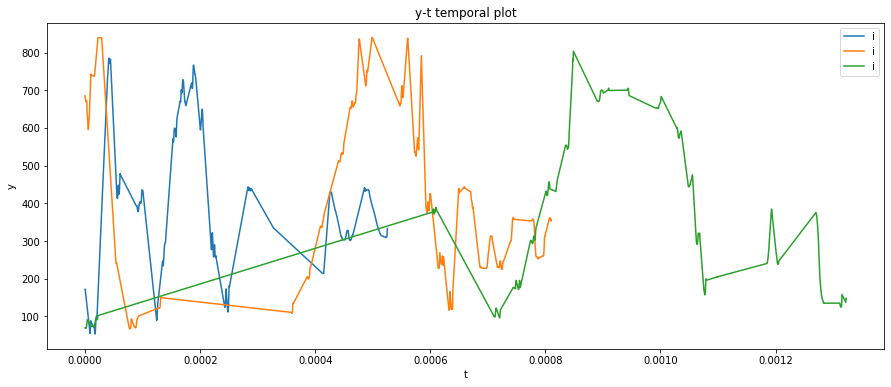

In [12]:
plt.figure(figsize=(15,6))
plt.title('y-t temporal plot')
plt.ylabel('y')
plt.xlabel('t')
for i in range(3):
    plt.plot(data['t'][i], data['y'][i], label='i')
plt.legend()
plt.show()

/Users/daidew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


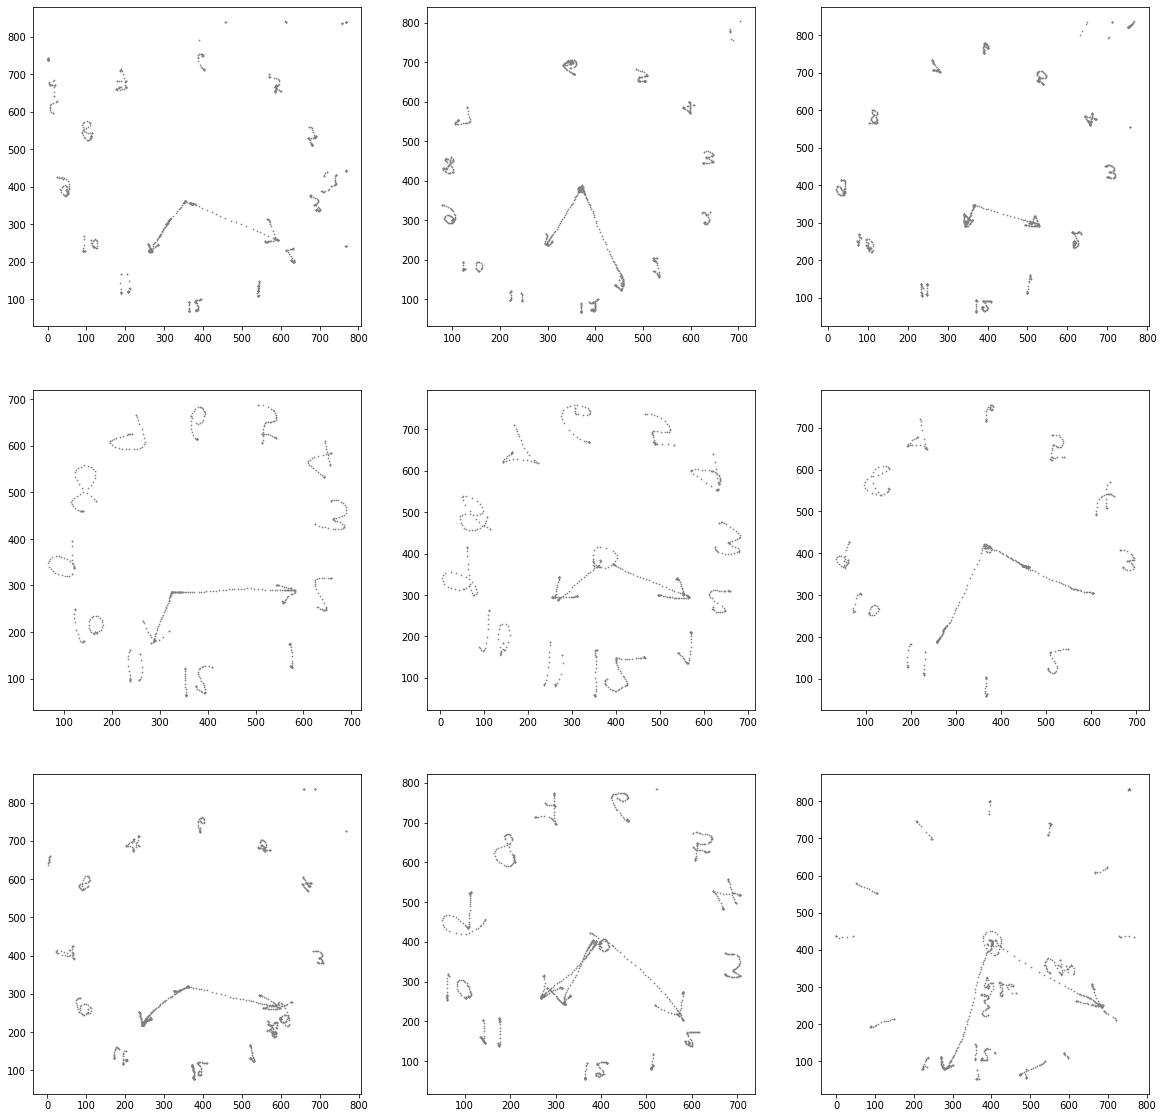

In [13]:
plt.figure(figsize=(20,20))

plt.title('clock temporal plot')
plt.ylabel('y')
plt.xlabel('x')
color = ['gray', 'red', 'blue']
it = 1
for i in range(9):
    for j in range(len(data['t'][it])):
#         print(data['x'][i][j], data['y'][i][j])
        plt.subplot(3,3,it)
        plt.scatter(data['x'][it][j], data['y'][it][j], color=color[0],s=0.5)
    it += 1
plt.show()

# Preprocess data

Convert male, female to integer -> 0 = male, 1 = female

In [14]:
gender = data['gender']
gender[gender == '1-Female'] = 1
gender[gender == '0-Male'] = 0

Convert right, left hand to integer -> 0 = left, 1 = right

In [15]:
side = data['side']
side[side == '1-Right'] = 1
side[side == '0-Left'] = 0

Convert education to integer ->  (0= no, 1= primary, 2=high school, 3=vocational training, 4=bachelor degree, 5= more than Bachelor)

In [16]:
side = data['ed']
for i in range(len(side)):
    side[i] = int(side[i][0])
data['ed']

array([4, 5, 4, 4, 2, 4, 4, 5, 1, 2, 4, 0, 1, 5, 0, 4, 4, 4, 1, 4, 4, 0,
       4, 4, 4, 4, 4, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 4, 4, 5, 5, 4, 4, 3,
       1, 4, 4, 4, 5, 1, 4, 3, 3, 4, 4, 4, 2, 2, 2, 4, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 5, 5, 5, 5, 5, 2, 2, 1, 1, 4, 4, 5, 5, 4, 3, 3, 3, 4,
       4, 4, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 5, 1, 1, 5, 5, 4, 5, 3, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4,
       4, 2, 4, 0, 0, 3, 3, 4, 4, 4, 1, 4, 1, 1, 1, 2, 4, 2, 2, 5, 4, 4,
       1, 1, 1, 2, 4, 2, 5, 5, 3, 5, 4, 2, 2, 5, 0, 0, 1, 4, 4, 4, 2, 4,
       5, 5, 2, 5, 5, 4, 1, 4, 0, 3, 3, 1, 5, 5, 3, 0, 1, 2, 1, 1],
      dtype=object)

In [17]:
data['age']

array([45, 64, 50, 67, 64, 50, 49, 77, 60, 78, 56, 78, 0, 0, 0, 0, 53, 59,
       63, 56, 52, 55, 0, 55, 61, 64, 51, 62, 42, 59, 71, 67, 65, 56, 56,
       57, 57, 48, 44, 65, 69, 67, 58, 60, 66, 58, 53, 52, 43, 53, 52, 63,
       73, 54, 56, 56, 73, 48, 69, 73, 63, 63, 64, 64, 58, 65, 65, 0, 45,
       45, 67, 64, 64, 49, 49, 39, 39, 55, 55, 60, 60, 64, 64, 48, 35, 35,
       58, 63, 62, 73, 76, 76, 63, 63, 57, 57, 68, 68, 0, 65, 57, 57, 40,
       40, 79, 79, 42, 60, 53, 62, 66, 70, 61, 44, 62, 62, 53, 53, 68, 65,
       47, 47, 59, 59, 53, 51, 51, 63, 63, 47, 47, 79, 79, 58, 40, 0, 0,
       64, 67, 81, 81, 48, 77, 63, 60, 58, 58, 49, 64, 68, 63, 76, 43, 43,
       66, 59, 71, 74, 63, 54, 60, 42, 55, 65, 54, 69, 61, 43, 0, 0, 49,
       74, 54, 66, 72, 69, 54, 52, 59, 85, 85, 64, 75, 61, 72, 61, 49, 70,
       69, 65, 51, 0, 64, 69, 51, 46], dtype=object)

Replace age = 0 with mean age.

In [18]:
age = data['age']
age[age == 0] = np.mean(age[age != 0])
data['age']

array([45, 64, 50, 67, 64, 50, 49, 77, 60, 78, 56, 78, 59.67934782608695,
       59.67934782608695, 59.67934782608695, 59.67934782608695, 53, 59,
       63, 56, 52, 55, 59.67934782608695, 55, 61, 64, 51, 62, 42, 59, 71,
       67, 65, 56, 56, 57, 57, 48, 44, 65, 69, 67, 58, 60, 66, 58, 53, 52,
       43, 53, 52, 63, 73, 54, 56, 56, 73, 48, 69, 73, 63, 63, 64, 64, 58,
       65, 65, 59.67934782608695, 45, 45, 67, 64, 64, 49, 49, 39, 39, 55,
       55, 60, 60, 64, 64, 48, 35, 35, 58, 63, 62, 73, 76, 76, 63, 63, 57,
       57, 68, 68, 59.67934782608695, 65, 57, 57, 40, 40, 79, 79, 42, 60,
       53, 62, 66, 70, 61, 44, 62, 62, 53, 53, 68, 65, 47, 47, 59, 59, 53,
       51, 51, 63, 63, 47, 47, 79, 79, 58, 40, 59.67934782608695,
       59.67934782608695, 64, 67, 81, 81, 48, 77, 63, 60, 58, 58, 49, 64,
       68, 63, 76, 43, 43, 66, 59, 71, 74, 63, 54, 60, 42, 55, 65, 54, 69,
       61, 43, 59.67934782608695, 59.67934782608695, 49, 74, 54, 66, 72,
       69, 54, 52, 59, 85, 85, 64, 75, 61, 7

Replace TMSE = 0 with the specified rules:

- <4 ปี อาจใช้เกณฑ์ 19 คะแนน

- 5 - 8 ปี อาจใช้เกณฑ์ 23 คะแนน

- 9 - 12 ปีอาจใช้เกณฑ์ 27 คะแนน

- ระดับอุดมศึกษา อาจใช้เกณฑ์ 29 คะแนน

In [19]:
tmse = data['TMSE']
for i in range(len(tmse)):
    if tmse[i] == 0:
        if data['age'][i] < 4:
            tmse[i] = 19
        elif data['age'][i] <= 8:
            tmse[i] = 23
        elif data['age'][i] <= 12:
            tmse[i] = 27
        else:
            tmse[i] = 29
data['TMSE']

array([29, 30, 28, 30, 26, 30, 30, 30, 28, 29, 27, 29, 29, 29, 29, 26, 27,
       29, 29, 29, 28, 29, 28, 29, 30, 27, 29, 26, 29, 28, 29, 29, 30, 30,
       30, 25, 25, 30, 29, 30, 28, 26, 30, 28, 26, 29, 27, 27, 29, 28, 30,
       28, 29, 27, 30, 30, 30, 24, 29, 28, 30, 30, 27, 27, 29, 29, 29, 27,
       29, 29, 27, 28, 28, 27, 27, 29, 29, 27, 27, 28, 28, 30, 30, 30, 30,
       30, 29, 29, 29, 28, 28, 29, 28, 28, 29, 28, 29, 29, 29, 29, 27, 27,
       28, 28, 27, 27, 29, 26, 29, 26, 30, 27, 26, 29, 30, 30, 30, 30, 30,
       30, 25, 25, 29, 29, 29, 30, 30, 27, 27, 30, 30, 26, 26, 26, 29, 29,
       29, 27, 28, 29, 29, 29, 27, 28, 26, 25, 25, 29, 27, 28, 25, 28, 29,
       28, 25, 24, 29, 25, 30, 26, 29, 30, 27, 30, 27, 28, 28, 29, 29, 29,
       29, 26, 29, 29, 27, 27, 29, 28, 27, 29, 29, 27, 24, 29, 28, 27, 26,
       24, 27, 30, 28, 29, 26, 29, 27, 25], dtype=object)

This pairplot will show estimate 'shape' of the data for each pair of variables. We will color each point by diagnosis status. However, I have found that the plot does not make sense. The label might be inverted (see the duration).

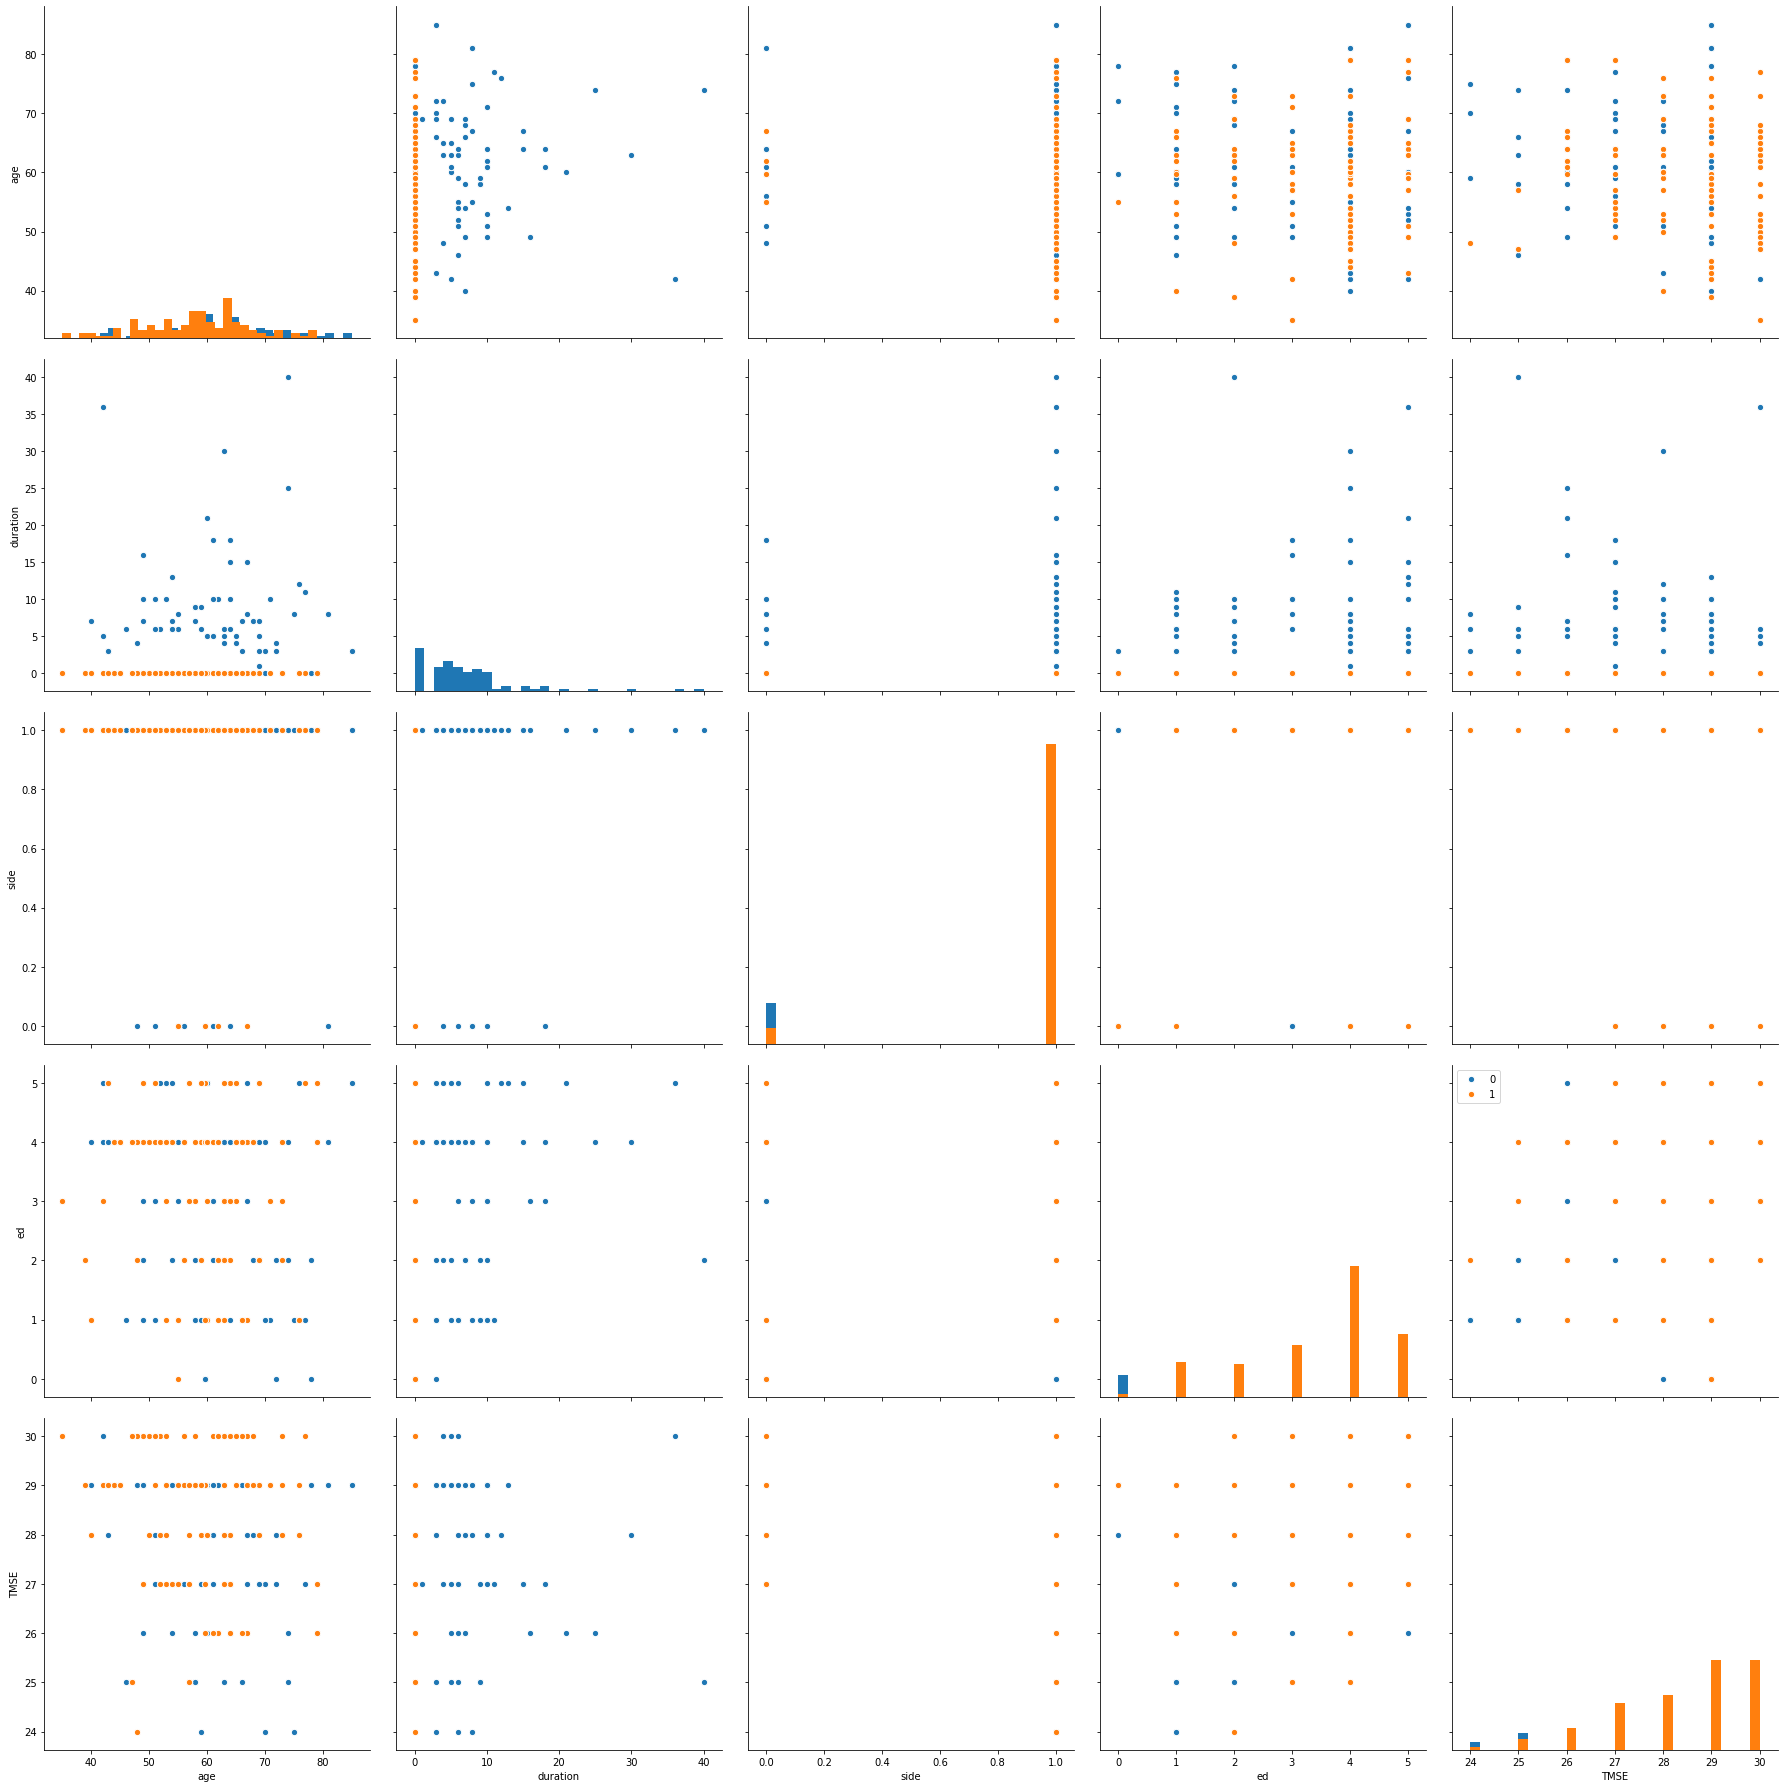

<Figure size 720x720 with 0 Axes>

In [20]:
g = sns.PairGrid(pd.DataFrame(data), vars=['age','duration', 'side', 'ed','TMSE' ], hue="diagnosis", height=5)
g.map_diag(plt.hist, bins=30)
g.map_offdiag(plt.scatter, edgecolor="w", s=40)
plt.legend()
plt.figure(figsize=(10,10))
plt.show()

Now, change the coloring for label 'clock_drawing'

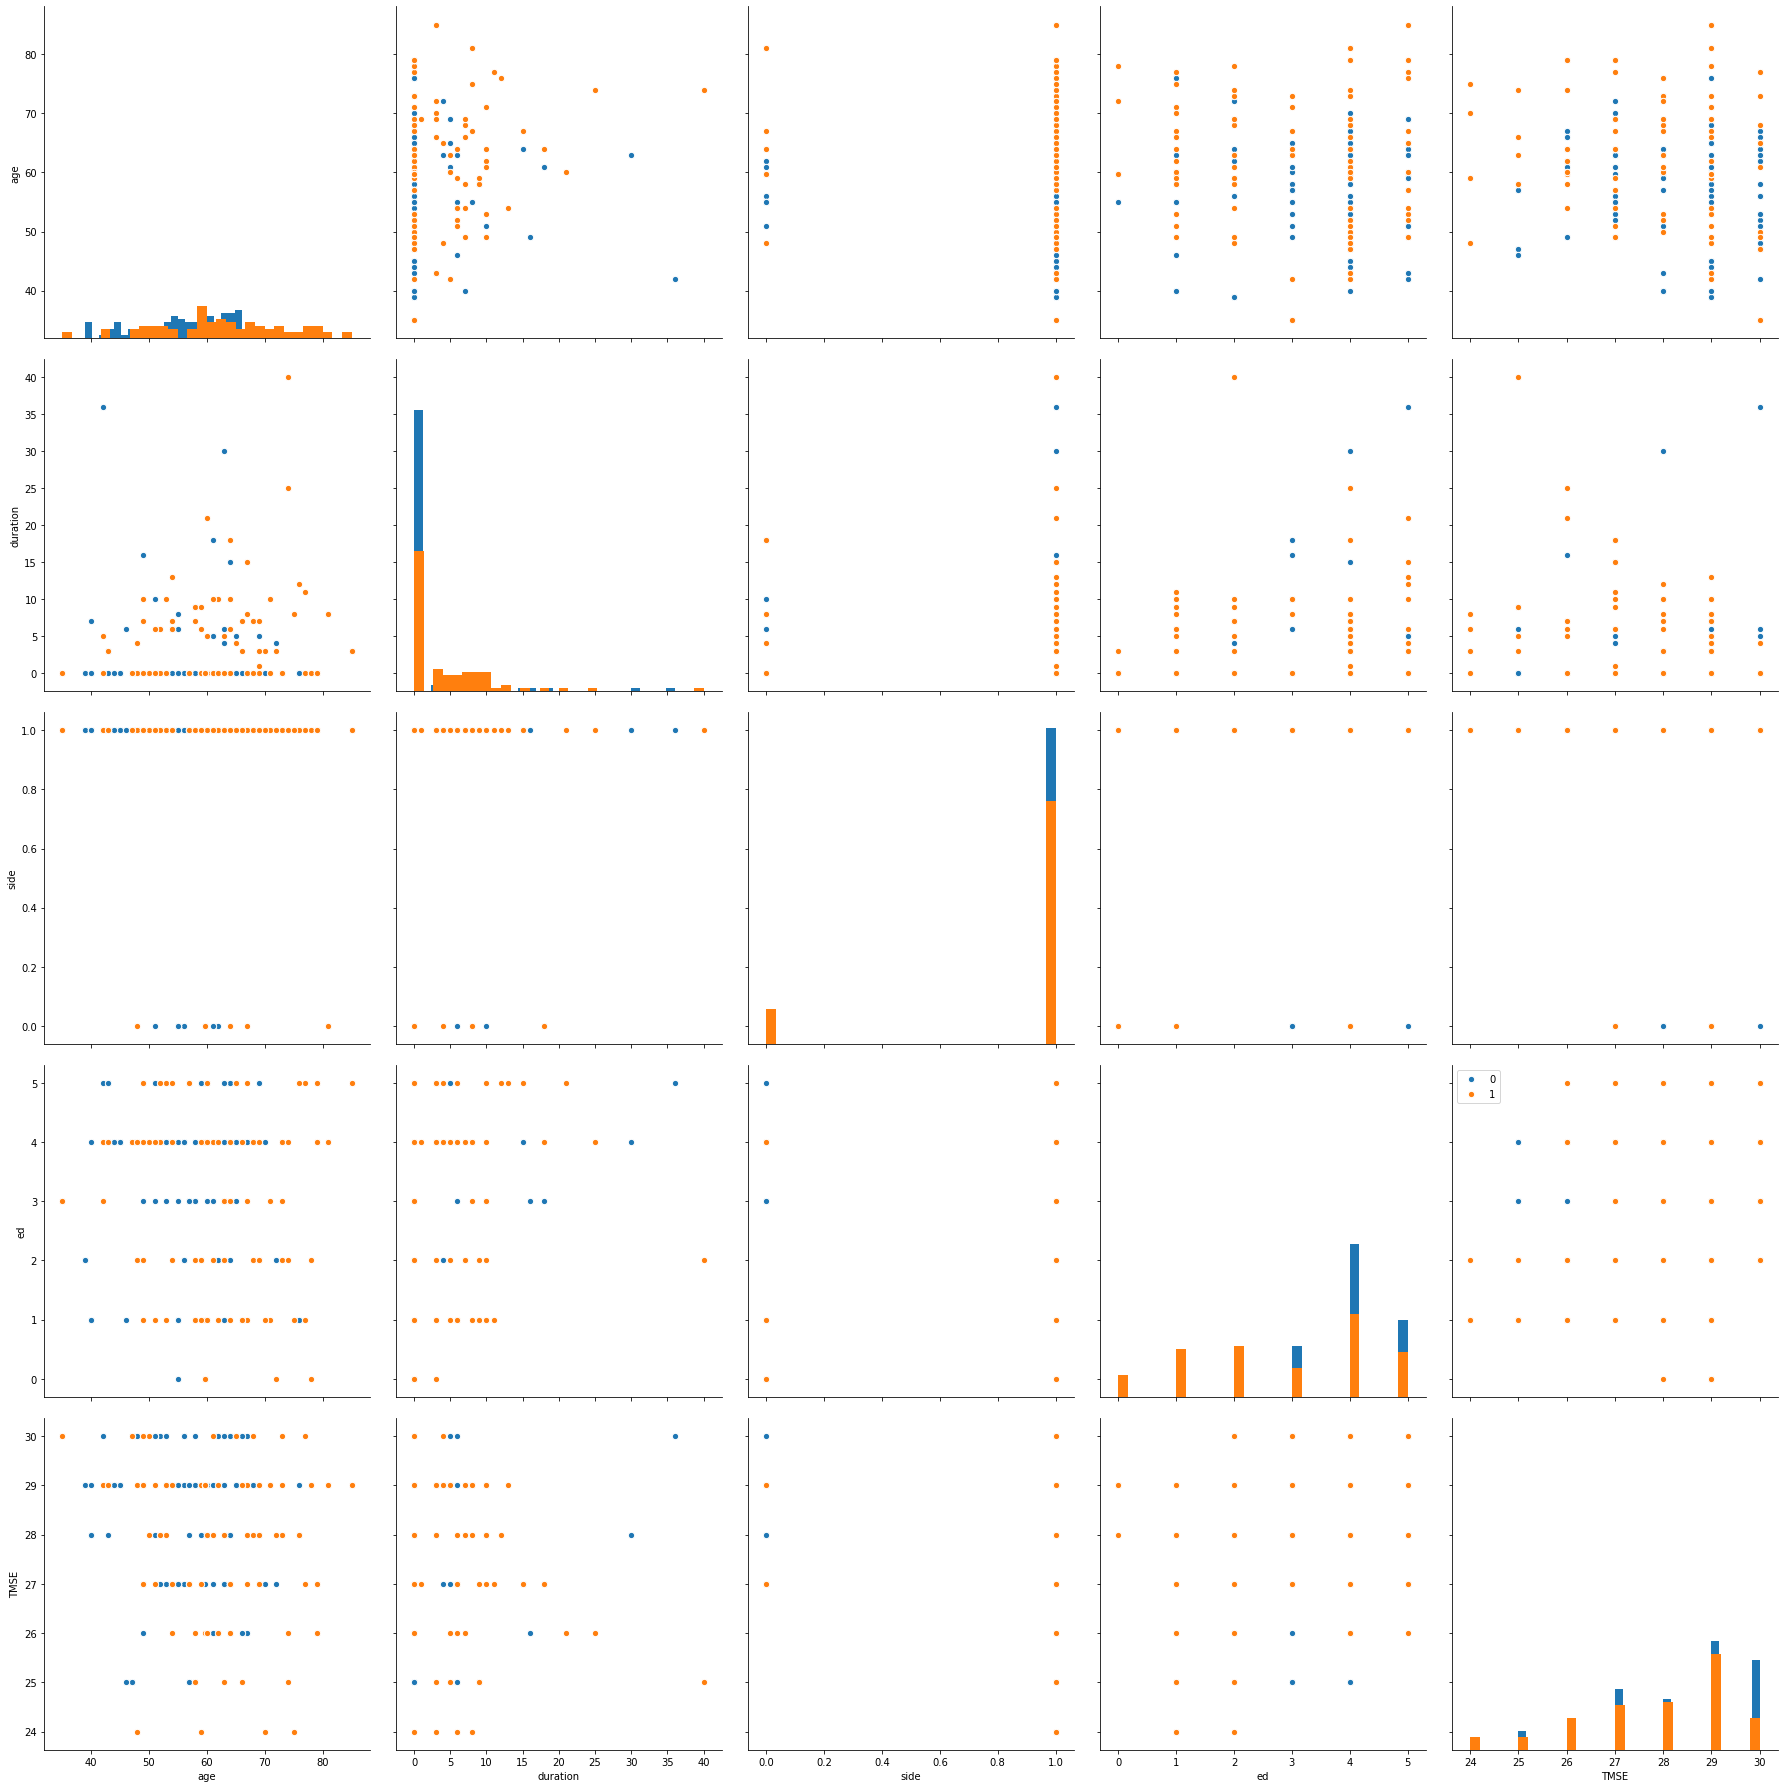

<Figure size 720x720 with 0 Axes>

In [21]:
g = sns.PairGrid(pd.DataFrame(data), vars=['age','duration', 'side', 'ed','TMSE' ],hue='clock_drawing', height=5)
g.map_diag(plt.hist, bins=30)
g.map_offdiag(plt.scatter, edgecolor="w", s=40)
plt.legend()
plt.figure(figsize=(10,10))
plt.show()

Distribution plot after cleaning the data.

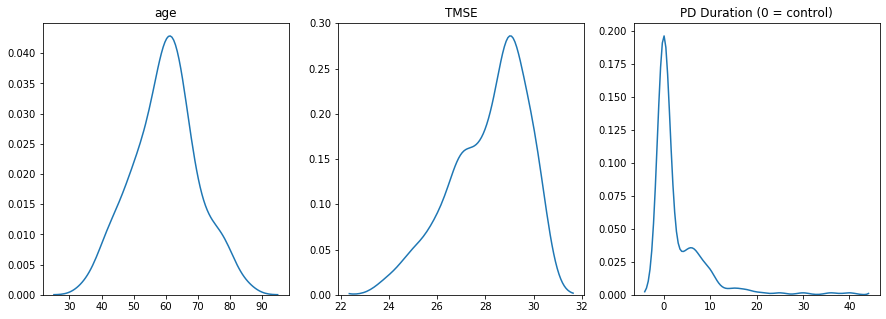

In [22]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('age')
sns.kdeplot(data['age'])
plt.subplot(1, 3, 2)
plt.title('TMSE')
sns.kdeplot(data['TMSE'])
plt.subplot(1, 3, 3)
plt.title('PD Duration (0 = control)')
sns.kdeplot(data['duration'])
plt.show()

Num of left, right hand sided

In [23]:
np.sum(data['side'] == 0),np.sum(data['side'] == 1) 

(21, 175)

In [24]:
df = pd.DataFrame(data)

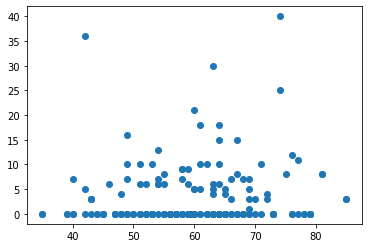

In [25]:
plt.scatter(data['age'], data['duration'])

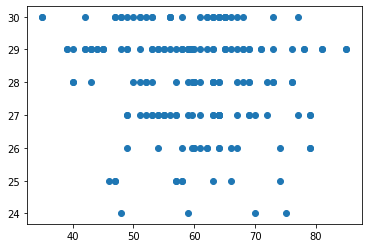

In [26]:
plt.scatter(data['age'], data['TMSE'])

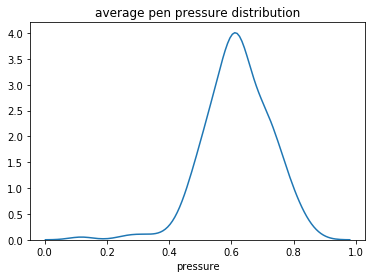

In [36]:
plt.title('average pen pressure distribution')
pts = []
for i in range(data.shape[0]):
    pts.append(np.mean(data['p'][i]))
plt.xlabel('pressure')
sns.kdeplot(pts)
plt.show()

In [31]:
data.shape[0]

196